<Axes: xlabel='Index', ylabel='Query value'>

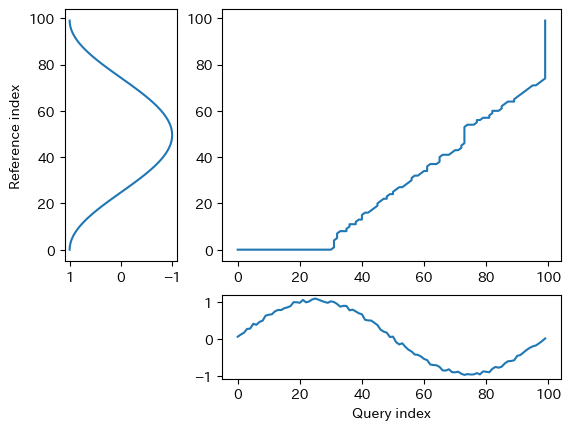

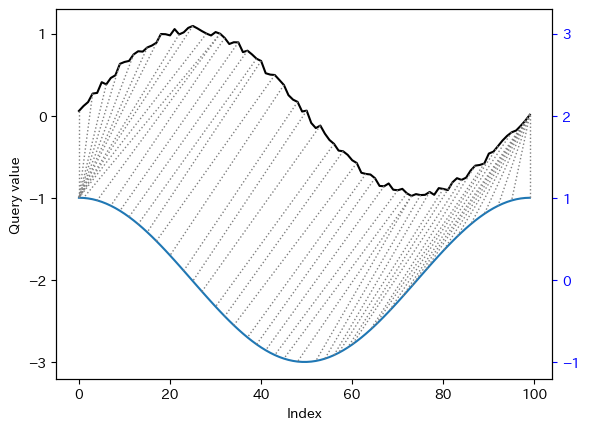

In [6]:
import numpy as np
from dtw import dtw, rabinerJuangStepPattern

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway", offset=-2)

alignment.plot(type="twoway", offset=-2)

<Axes: >

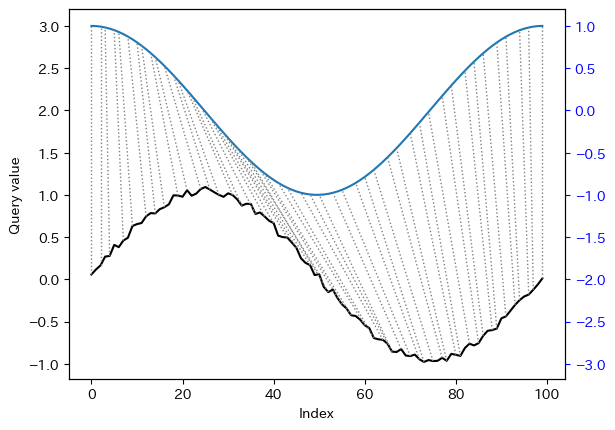

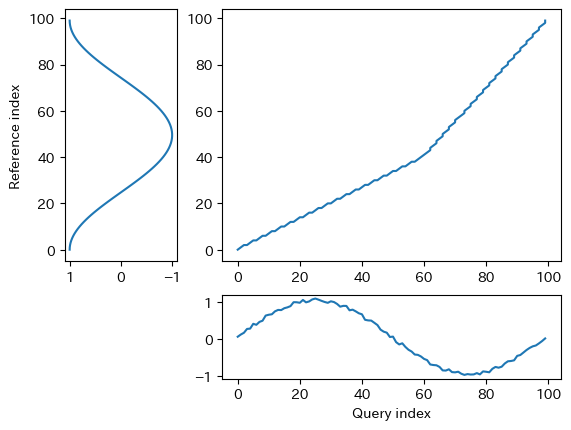

In [14]:
## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
alignment = dtw(query, template, keep_internals=True,
                step_pattern=rabinerJuangStepPattern(6, "c"))
alignment.plot(type="twoway",offset=2)
alignment.plot(type="threeway",offset=2)


Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



/home/devuser/workspace/backend/.venv/lib/python3.10/site-packages/dtw/stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


<Axes: xlabel='Query index', ylabel='Reference index'>

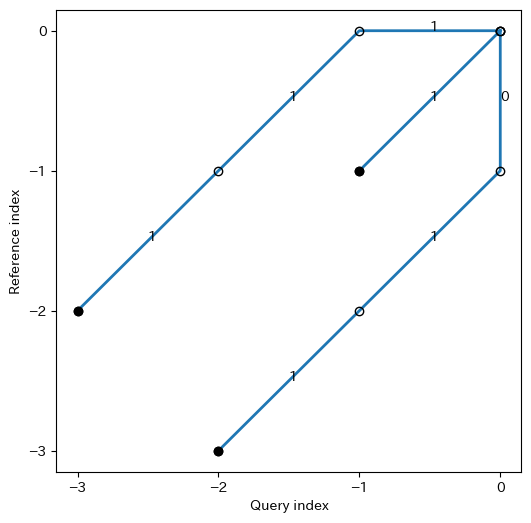

In [17]:
## See the recursion relation, as formula and diagram
step_pattern = rabinerJuangStepPattern(6, "c")
print(step_pattern)
step_pattern.plot()



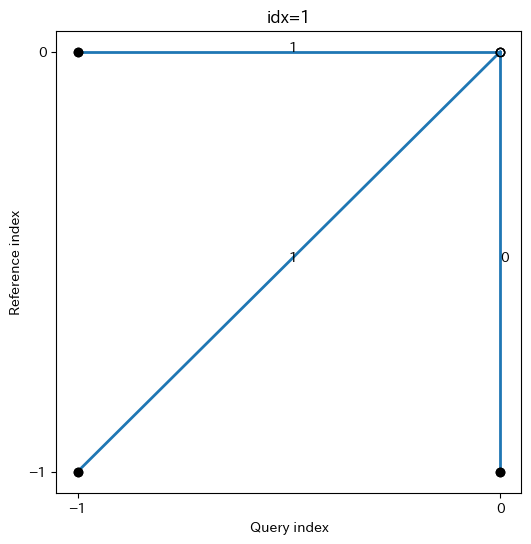

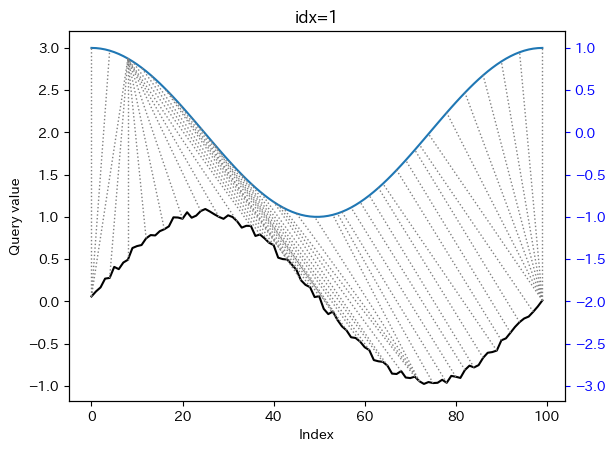

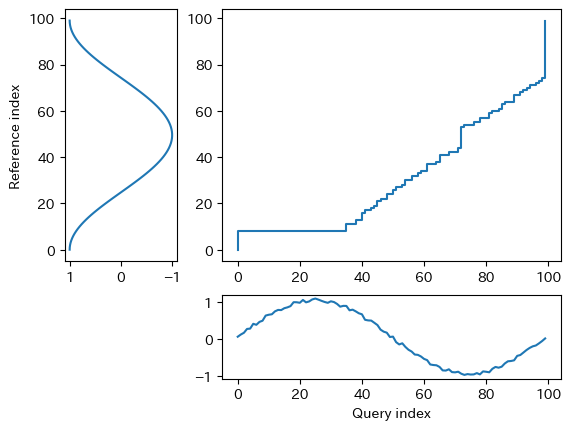

In [31]:
from matplotlib import pyplot


for idx in range(1, 7+1):
    step_pattern = rabinerJuangStepPattern(idx, "c")
    step_pattern.plot()
    pyplot.title(label=f"{idx=}")
    alignment = dtw(query, template, keep_internals=True,
                    step_pattern=step_pattern)
    alignment.plot(type="twoway",offset=2)
    pyplot.title(label=f"{idx=}")
    alignment.plot(type="threeway",offset=2)
